In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
%matplotlib inline

In [58]:
imdb = pd.read_csv("movie_metadata.csv")
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [59]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [60]:
imdb['num_critic_for_reviews'].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

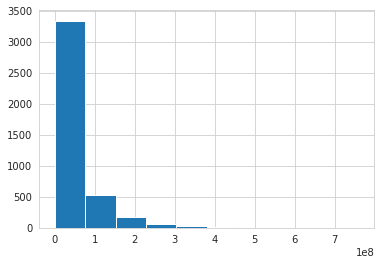

In [61]:
imdb['gross'].hist()

## Perguntas gerais
- Aventura tem nota melhor que comédia?
- Diretor com mais filmes tem nota melhor? Tem mais faturamento?
- as resposta são específicas para a amostra ou para o mundo?
- quais correlações existem entre os dados?
- bugter x gross (orçamento vs faturamento)
- title year

In [62]:
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [63]:
color_or_bw = imdb.dropna(subset=['color'])
len(color_or_bw)

5024

In [64]:
color_or_bw['color_0_ou_1'] = (color_or_bw['color'] == 'Color') * 1
color_or_bw['color'].value_counts()

/home/cesar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Color               4815
 Black and White     209
Name: color, dtype: int64

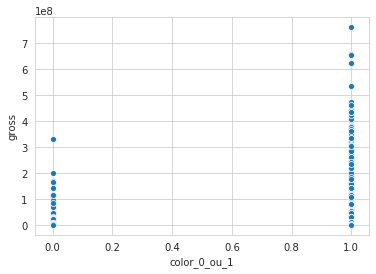

In [65]:
sns.scatterplot(data=color_or_bw, x='color_0_ou_1', y='gross')

In [66]:
color_or_bw.groupby('color').mean()['gross']

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [67]:
color_or_bw.groupby('color').mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [68]:
color_or_bw.groupby('color').median()['imdb_score']

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

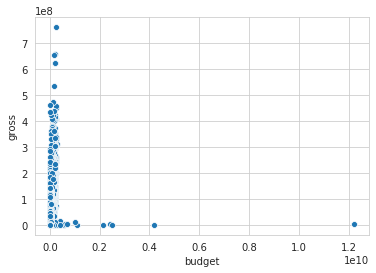

In [69]:
budget_gross = imdb[['budget', 'gross']].dropna().query("budget > 0 | gross > 0")
sns.scatterplot(x='budget', y='gross', data=budget_gross)

In [70]:
imdb.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


In [71]:
# lucro / prejuizo
imdb_usa = imdb[imdb['country'] == 'USA']
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [72]:
imdb = imdb.drop_duplicates(keep='first')

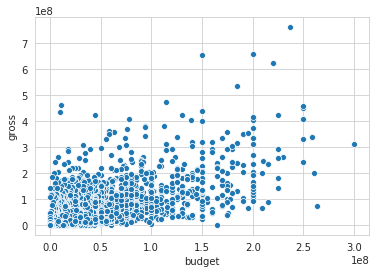

In [73]:
budget_gross = imdb_usa[['budget', 'gross']].dropna().query("budget > 0 | gross > 0")
sns.scatterplot(x='budget', y='gross', data=budget_gross)

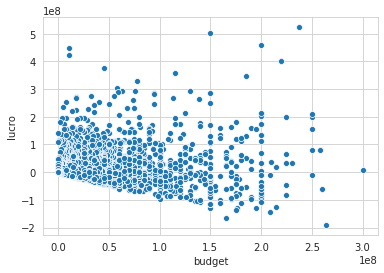

In [74]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa[['budget', 'lucro']].dropna().query("budget > 0 | lucro > 0")
sns.scatterplot(x='budget', y='lucro', data=budget_gross)

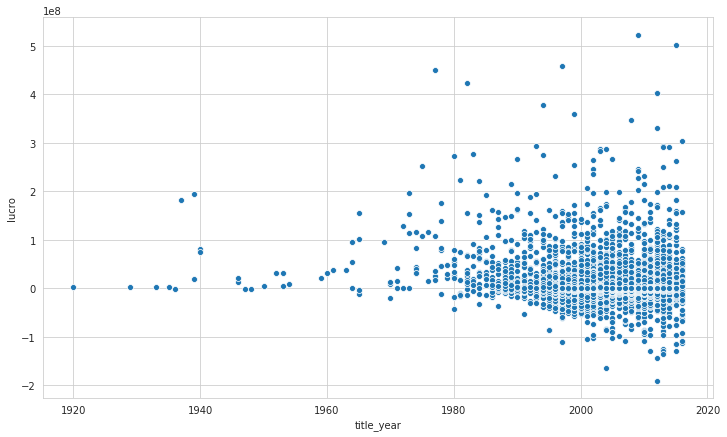

In [75]:

plt.figure(figsize=(12,7))
budget_gross = imdb_usa.query("budget > 0 | gross > 0")[['title_year', 'lucro']].dropna()
sns.scatterplot(x='title_year', y='lucro', data=budget_gross)

In [79]:
filmes_por_diretor = imdb_usa['director_name'].value_counts()
filmes_por_diretor.head()

Steven Spielberg    24
Martin Scorsese     20
Clint Eastwood      20
Woody Allen         18
Spike Lee           16
Name: director_name, dtype: int64

In [89]:
gross_director = imdb_usa[['director_name', 'gross']].set_index('director_name').join(filmes_por_diretor, on='director_name').rename(columns={"gross": 'dindin',"director_name": "qtd_filmes"})
gross_director.reset_index(inplace=True)

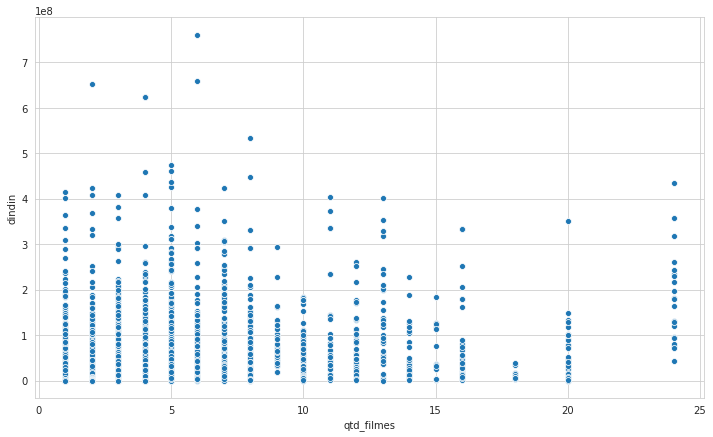

In [86]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='qtd_filmes', y='dindin', data=gross_director)

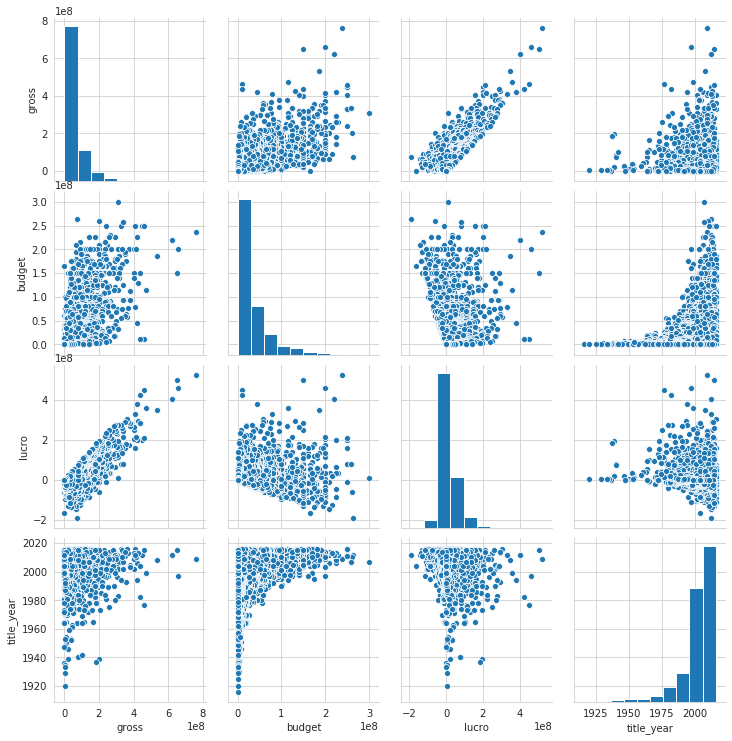

In [90]:
sns.pairplot(data=imdb_usa[['gross', 'budget', 'lucro', 'title_year']])

In [92]:
imdb_usa[['gross', 'budget', 'lucro', 'title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.646158,0.799260,0.036865
budget,0.646158,1.000000,0.057774,0.232640
lucro,0.799260,0.057774,1.000000,-0.122092
title_year,0.036865,0.232640,-0.122092,1.000000


### Desafio 1: Boxplot de média do colorido e do preto e branco
### Desafio 2: Quem gastou tubos e teve i prejuizo próximo de 2.5
### Desafio 3: Filmes mais recentes tiveram mais prejuízo?
### Desafio 4: Filmes pre 2a guerra que ganharam tanto dinheiro
### Desafio 5: Confirmar tese de que o estranho no mapa é Woody allen
### Desafio 6: Melhorar gráfico, mudar os marcadores
### Desafio 7: Correlação dos filmes após o ano 2000
### Desafio 8: Tentar encontrar uma reta (se gastar mais, lucra mais?)
### Desafio 9: Utilizar as notas nas correlações.
### Desafio 10: Número de avaliações por ano.